In [107]:
# importing necessary modules
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import pylab
import requests
import json

In [108]:
#read in csvs for 2017 stats, cost of living index, and physician demographic info
data_2017 = os.path.join('Resources', '2017.csv')
data_2017 = pd.read_csv(data_2017)
cost = os.path.join('Resources', 'cost_of_living_state.csv')
physician_data = os.path.join('Resources', "physician_data.csv")
physician_data = pd.read_csv(physician_data)
nurse_data = os.path.join("Resources", "nurse_data.csv")
nurse_data = pd.read_csv(nurse_data)
pa_data = os.path.join("Resources", "PA_data.csv")
pa_data = pd.read_csv(pa_data)
cost_living = pd.read_csv(cost)
data_2017.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,023 - CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACU...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,28,117117.79,25823.71,24057.39
1,025 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,32,98357.56,20688.34,19791.41
2,027 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,11,69153.55,11811.18,8194.36
3,037 - EXTRACRANIAL PROCEDURES W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,12,100427.33,19134.00,18154.00
4,038 - EXTRACRANIAL PROCEDURES W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,17,58199.47,8519.47,6714.88


In [109]:
#number of enrollees by state and type of plan
enroll_data = os.path.join('Resources', 'Medicare_Enrollment.csv')
enrollees = pd.read_csv(enroll_data)

In [110]:
#create DF and convert to numeric
enrollees_df = pd.DataFrame(enrollees)
enrollees_df[["Original Medicare", 
           "Medicare Advantage & Other Health Plans"]] = enrollees_df[[ 
                                                        "Original Medicare", 
                                                        "Medicare Advantage & Other Health Plans"]].apply(pd.to_numeric)
enrollees_df.head()

,State,Total,Original Medicare,Medicare Advantage & Other Health Plans
0,Alabama,935026,568207,366819
1,Alaska,80134,78805,1329
2,Arizona,1122760,650109,472650
3,Arkansas,572605,436607,135999
4,California,5314498,2825802,2488697


In [111]:
#add a column calculating what % of people are on premium plans
enrollees_df['Percentage of Medicare Advantage'] = round((enrollees_df['Medicare Advantage & Other Health Plans'] / 
                                                   enrollees_df['Total']) * 100, 1)
enrollees_df.head()

,State,Total,Original Medicare,Medicare Advantage & Other Health Plans,Percentage of Medicare Advantage
0,Alabama,935026,568207,366819,39.2
1,Alaska,80134,78805,1329,1.7
2,Arizona,1122760,650109,472650,42.1
3,Arkansas,572605,436607,135999,23.8
4,California,5314498,2825802,2488697,46.8


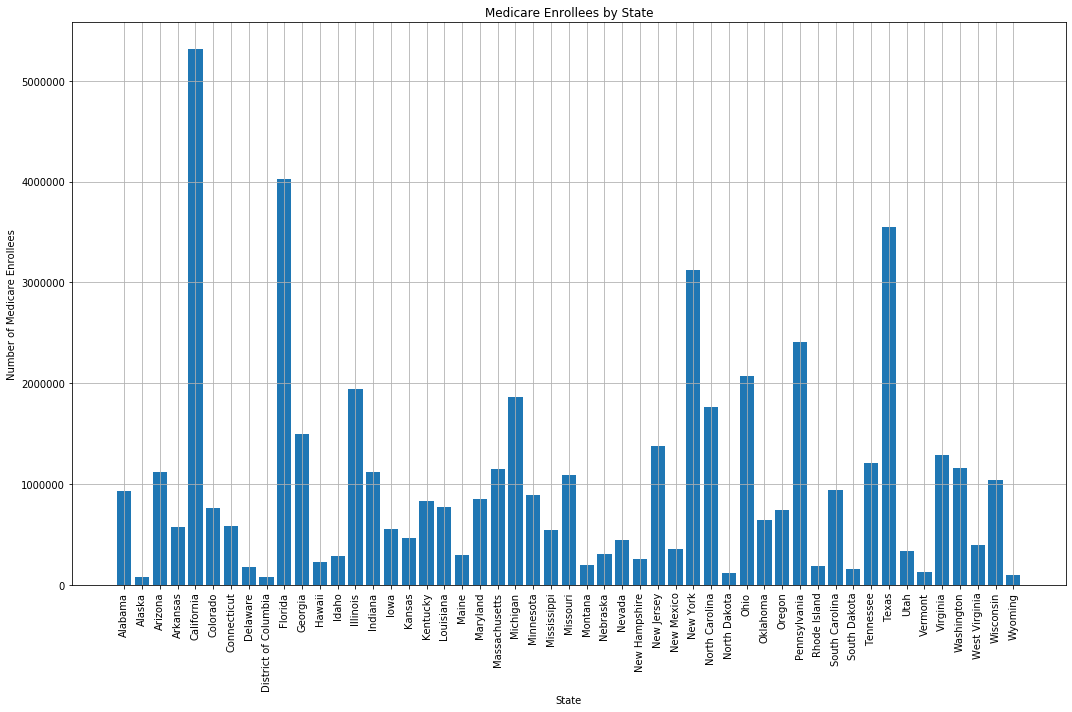

In [112]:
names = []
for name in enrollees["State"]: 
    names.append(name)
#chart showing how many Medicare recipients per state
plt.figure(figsize=(15,10))
x_axis = np.arange(len(enrollees_df["State"]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, names, rotation="vertical")
plt.bar(x_axis, enrollees_df["Total"])
plt.grid()
plt.xlabel("State")
plt.ylabel("Number of Medicare Enrollees")
plt.title("Medicare Enrollees by State")
plt.tight_layout()
plt.savefig("Medicare enrollees by State")

In [113]:
#for ease in converting states to abbreviations for easier merging later
us_state_abbrev = [{
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}]

abbrevs_df = pd.DataFrame(us_state_abbrev).T
abbrevs_df = abbrevs_df.reset_index().rename(columns={0: 'provider_state', 'index':'State'})

In [114]:
#work on this later- a different way to convert state names

# for state in cost_living['State']:
#     for name in abbrevs_df['State']:
#         if state == name:
#             cost_living['State'] = abbrevs_df.loc['Abbreviation']
            
# cost_living

In [117]:
# verifying physician data.
physician_data.head()

,Location,Primary Care Physicians,Specialist Physicians,Total
0,United States,479856.0,525439.0,1005295.0
1,Alabama,5863.0,6342.0,12205.0
2,Alaska,1054.0,846.0,1900.0
3,Arizona,8537.0,9269.0,17806.0
4,Arkansas,3513.0,3637.0,7150.0


In [118]:
# renaming columns of physician_data data frame.
physician_data = physician_data = physician_data.rename(columns={"Location": "State", "Primary Care Physicians": "primary_care_physicians", "Specialist Physicians": "specialist_physicians"})

In [119]:
# merging state abbreviations to physician_data dataframe.
physician_data = pd.merge(physician_data, abbrevs_df, on="State")

# verifying merge worked.
physician_data.head()

,State,primary_care_physicians,specialist_physicians,Total,provider_state
0,Alabama,5863.0,6342.0,12205.0,AL
1,Alaska,1054.0,846.0,1900.0,AK
2,Arizona,8537.0,9269.0,17806.0,AZ
3,Arkansas,3513.0,3637.0,7150.0,AR
4,California,54135.0,58771.0,112906.0,CA


In [120]:
# viewing nurse data frame.
nurse_data.head()

,Location,Total
0,United States,165480.0
1,Alabama,2537.0
2,Alaska,480.0
3,Arizona,3403.0
4,Arkansas,1305.0


In [121]:
# renaming columns of physician_data data frame.
nurse_data = nurse_data.rename(columns={"Location": "State", "Total": "nurse_total"})

In [122]:
# verifying results.
nurse_data.head()

,State,nurse_total
0,United States,165480.0
1,Alabama,2537.0
2,Alaska,480.0
3,Arizona,3403.0
4,Arkansas,1305.0


In [123]:
# merging state abbreviations to nurse_data dataframe.
nurse_data = pd.merge(nurse_data, abbrevs_df, on="State")

# verifying merge worked.
nurse_data.head()

,State,nurse_total,provider_state
0,Alabama,2537.0,AL
1,Alaska,480.0,AK
2,Arizona,3403.0,AZ
3,Arkansas,1305.0,AR
4,California,15414.0,CA


In [124]:
# viewing physician assitants data frame.
pa_data.head()

,Location,Total
0,United States,88604.0
1,Alabama,535.0
2,Alaska,346.0
3,Arizona,1940.0
4,Arkansas,209.0


In [125]:
# renaming columns of physician_data data frame.
pa_data = pa_data.rename(columns={"Location": "State", "Total": "pa_total"})

In [126]:
# verifying name change worked.
pa_data.head()

,State,pa_total
0,United States,88604.0
1,Alabama,535.0
2,Alaska,346.0
3,Arizona,1940.0
4,Arkansas,209.0


In [127]:
# merging state abbreviations to pa_data dataframe.
pa_data = pd.merge(pa_data, abbrevs_df, on="State")

# verifying merge worked.
pa_data.head()
# all physician_data, nurse_data and pa_data dataframes will be used at very end to make scatter plots comparing number of "" to per capita average total payments per discharge by state.

,State,pa_total,provider_state
0,Alabama,535.0,AL
1,Alaska,346.0,AK
2,Arizona,1940.0,AZ
3,Arkansas,209.0,AR
4,California,7917.0,CA


In [128]:
# merging physician_data and nurse_data datframe for analysis at the end.
labor_comparison = pd.merge(physician_data, nurse_data, on="provider_state")
# verifying results.
labor_comparison.head()

,State_x,primary_care_physicians,specialist_physicians,Total,provider_state,State_y,nurse_total
0,Alabama,5863.0,6342.0,12205.0,AL,Alabama,2537.0
1,Alaska,1054.0,846.0,1900.0,AK,Alaska,480.0
2,Arizona,8537.0,9269.0,17806.0,AZ,Arizona,3403.0
3,Arkansas,3513.0,3637.0,7150.0,AR,Arkansas,1305.0
4,California,54135.0,58771.0,112906.0,CA,California,15414.0


In [129]:
# merging merged dataframe above with pa_data dataframe for same reason stated above.
labor_comparison = pd.merge(labor_comparison, pa_data, on="provider_state")
# verifying results.
labor_comparison.head()

,State_x,primary_care_physicians,specialist_physicians,Total,provider_state,State_y,nurse_total,State,pa_total
0,Alabama,5863.0,6342.0,12205.0,AL,Alabama,2537.0,Alabama,535.0
1,Alaska,1054.0,846.0,1900.0,AK,Alaska,480.0,Alaska,346.0
2,Arizona,8537.0,9269.0,17806.0,AZ,Arizona,3403.0,Arizona,1940.0
3,Arkansas,3513.0,3637.0,7150.0,AR,Arkansas,1305.0,Arkansas,209.0
4,California,54135.0,58771.0,112906.0,CA,California,15414.0,California,7917.0


In [130]:
# merging cost_living and enrollees_df dataframes and setting to variable.
cost_enrollees_merge = pd.merge(cost_living, enrollees_df, how='outer', on='State')
# verifying merge worked.
cost_enrollees_merge.head()

,costIndex,State,costRank,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost,Total,Original Medicare,Medicare Advantage & Other Health Plans,Percentage of Medicare Advantage
0,1,Mississippi,86.1,91.6,70.1,89.1,89.2,91.4,545769,446980,98789,18.1
1,2,Arkansas,86.9,92.0,73.9,91.8,83.6,85.6,572605,436607,135999,23.8
2,3,Oklahoma,87.0,95.4,71.9,94.1,89.5,93.2,646237,518215,128021,19.8
3,4,Missouri,87.1,96.6,70.6,99.6,87.3,95.7,1092124,713966,378158,34.6
4,5,New Mexico,87.5,100.9,77.7,87.9,91.6,100.1,358531,224594,133937,37.4


In [131]:
# merging cost_enrollees_merge dataframe with abbrevs_df dataframe and setting to variable.
cost_abbrev = pd.merge(cost_enrollees_merge, abbrevs_df, how='left')
# verifying merge worked.
cost_abbrev.head()

,costIndex,State,costRank,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost,Total,Original Medicare,Medicare Advantage & Other Health Plans,Percentage of Medicare Advantage,provider_state
0,1,Mississippi,86.1,91.6,70.1,89.1,89.2,91.4,545769,446980,98789,18.1,MS
1,2,Arkansas,86.9,92.0,73.9,91.8,83.6,85.6,572605,436607,135999,23.8,AR
2,3,Oklahoma,87.0,95.4,71.9,94.1,89.5,93.2,646237,518215,128021,19.8,OK
3,4,Missouri,87.1,96.6,70.6,99.6,87.3,95.7,1092124,713966,378158,34.6,MO
4,5,New Mexico,87.5,100.9,77.7,87.9,91.6,100.1,358531,224594,133937,37.4,NM


In [132]:
#drop columns that we won't need and sorting values.
sorted_df = cost_abbrev.sort_values(['provider_state'])
sorted_df = sorted_df.drop(columns=['costIndex', 'State'])
# verifying dataframe.
sorted_df.head()

,costRank,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost,Total,Original Medicare,Medicare Advantage & Other Health Plans,Percentage of Medicare Advantage,provider_state
44,129.9,134.2,133.9,154.2,130.8,150.9,80134,78805,1329,1.7,AK
10,89.3,97.4,71.5,103.3,88.6,90.8,935026,568207,366819,39.2,AL
1,86.9,92.0,73.9,91.8,83.6,85.6,572605,436607,135999,23.8,AR
23,97.0,96.9,91.7,107.4,109.6,94.7,1122760,650109,472650,42.1,AZ
48,151.7,121.4,227.3,117.7,138.9,114.5,5314498,2825802,2488697,46.8,CA


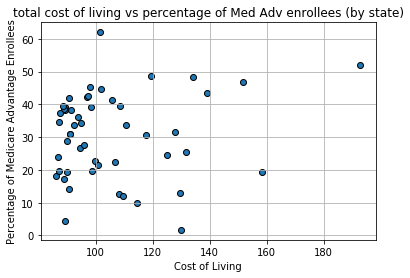

In [133]:
#set up scatter plot to show relationship between total cost of living and enrollees on premium plans
plt.scatter(sorted_df['costRank'], sorted_df['Percentage of Medicare Advantage'], edgecolor='k')
plt.grid(True)
plt.title('total cost of living vs percentage of Med Adv enrollees (by state)')
plt.xlabel('Cost of Living')
plt.ylabel('Percentage of Medicare Advantage Enrollees')

#save and then show chart
# plt.savefig('medadvandcostliving.png')
plt.show()

In [134]:
# calculating correlation between costRank and Percentage of Medicare Advantage by creating smaller dataframe and then applying corr() function.
medadvcost = sorted_df[['costRank', 'Percentage of Medicare Advantage']]
medadvcost.corr()

,costRank,Percentage of Medicare Advantage
costRank,1.000000,0.124048
Percentage of Medicare Advantage,0.124048,1.000000


In [135]:
# reformatting the names of the columns of data_2017 dataframe into usuable form.
data_2017.columns = data_2017.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [136]:
# verifying new column names.
data_2017.head()

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region_hrr_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
0,023 - CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACU...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,28,117117.79,25823.71,24057.39
1,025 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,32,98357.56,20688.34,19791.41
2,027 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,11,69153.55,11811.18,8194.36
3,037 - EXTRACRANIAL PROCEDURES W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,12,100427.33,19134.00,18154.00
4,038 - EXTRACRANIAL PROCEDURES W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,17,58199.47,8519.47,6714.88


In [137]:
# creating a more concise data_2017 dataframe for analysis purposes.
data_2017 = data_2017[["provider_state", "provider_name", "total_discharges", "average_covered_charges", "average_total_payments", "average_medicare_payments"]]

In [138]:
# adding column to data_2017 dataframe that shows consumer payments(average total payments - average medicare payments).
data_2017["average_consumer_payments"] = data_2017["average_total_payments"] - data_2017["average_medicare_payments"]

In [139]:
# verifying process above worked.
data_2017.head()

,provider_state,provider_name,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,average_consumer_payments
0,AL,SOUTHEAST ALABAMA MEDICAL CENTER,28,117117.79,25823.71,24057.39,1766.32
1,AL,SOUTHEAST ALABAMA MEDICAL CENTER,32,98357.56,20688.34,19791.41,896.93
2,AL,SOUTHEAST ALABAMA MEDICAL CENTER,11,69153.55,11811.18,8194.36,3616.82
3,AL,SOUTHEAST ALABAMA MEDICAL CENTER,12,100427.33,19134.00,18154.00,980.00
4,AL,SOUTHEAST ALABAMA MEDICAL CENTER,17,58199.47,8519.47,6714.88,1804.59


In [140]:
# Adding columns to data_2017 dataframe that represents total payments by each category. Doing this because data was in terms of averages so multiplied by total discharges to give total payments based on averages. We do this in order to find per capita payments later down the process.
data_2017['total_covered_charges'] = data_2017['total_discharges'] * data_2017['average_covered_charges']
data_2017['total_payments'] = data_2017['total_discharges'] * data_2017['average_total_payments']
data_2017['total_medicare_payments'] = data_2017['total_discharges'] * data_2017['average_medicare_payments']
data_2017['total_consumer_payments'] = data_2017['total_discharges'] * data_2017['average_consumer_payments']

In [141]:
# verifying the new total columns in data_2017 dataframe.
data_2017.head()

,provider_state,provider_name,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,average_consumer_payments,total_covered_charges,total_payments,total_medicare_payments,total_consumer_payments
0,AL,SOUTHEAST ALABAMA MEDICAL CENTER,28,117117.79,25823.71,24057.39,1766.32,3279298.12,723063.88,673606.92,49456.96
1,AL,SOUTHEAST ALABAMA MEDICAL CENTER,32,98357.56,20688.34,19791.41,896.93,3147441.92,662026.88,633325.12,28701.76
2,AL,SOUTHEAST ALABAMA MEDICAL CENTER,11,69153.55,11811.18,8194.36,3616.82,760689.05,129922.98,90137.96,39785.02
3,AL,SOUTHEAST ALABAMA MEDICAL CENTER,12,100427.33,19134.00,18154.00,980.00,1205127.96,229608.00,217848.00,11760.00
4,AL,SOUTHEAST ALABAMA MEDICAL CENTER,17,58199.47,8519.47,6714.88,1804.59,989390.99,144830.99,114152.96,30678.03


In [142]:
#url for a dataset comparing hospital charges and outcomes for 4 different categories
base_url = "https://data.medicare.gov/resource/2kat-xip9.json?"
states = abbrevs_df['provider_state'].tolist()

In [321]:
#create an empty list, for loop through dataset, and pull out tuples of info
outcomes = []

for state in states:
    print(f"Getting info for the state of {state}")
    query_url = base_url + 'state=' + state
    outcomes_data = requests.get(query_url)
    outcomes_json = outcomes_data.json()
    for ind in outcomes_json:
        try:
            outcomes.append((ind['state'], ind['hospital_name'], 
                             ind['zip_code'], ind['county_name'], 
                             ind['value_of_care_display_id'], ind['value_of_care_category']))
        except:
            print(f"No state found with the abbreviation of {state}")
        

Getting info for the state of AL
Getting info for the state of AK
Getting info for the state of AZ
Getting info for the state of AR
Getting info for the state of CA
Getting info for the state of CO
Getting info for the state of CT
Getting info for the state of DE
Getting info for the state of DC
Getting info for the state of FL
Getting info for the state of GA
Getting info for the state of HI
Getting info for the state of ID
Getting info for the state of IL
Getting info for the state of IN
Getting info for the state of IA
Getting info for the state of KS
Getting info for the state of KY
Getting info for the state of LA
Getting info for the state of ME
Getting info for the state of MD
Getting info for the state of MA
Getting info for the state of MI
Getting info for the state of MN
Getting info for the state of MS
Getting info for the state of MO
Getting info for the state of MT
Getting info for the state of NE
Getting info for the state of NV
Getting info for the state of NH
Getting in

In [143]:
#create df
outcomes_df = pd.DataFrame(outcomes, columns=('provider_state', 'provider_name', 'zip_code', 
                          'county_name', 'category', 'outcome_and_payment'))
#clean data by removing invalid results, etc
outcomes_df = outcomes_df[outcomes_df.outcome_and_payment != 'Not Available']
outcomes_df.head()

NameError: name 'outcomes' is not defined

In [144]:
#split outcome_and_payment into separate columns for easier comparisons
outcomes_df[['outcome', 'payment']] = outcomes_df['outcome_and_payment'].str.split(" and ", expand=True)
outcomes_df.head()

NameError: name 'outcomes_df' is not defined

In [145]:
df[~df['DB Serial'].str.contains('\*')]

NameError: name 'df' is not defined

In [146]:
mortality_outcomes = outcomes_df[~outcomes_df['outcome'].str.contains('Complications')]
mortality_outcomes.head()

NameError: name 'outcomes_df' is not defined

In [147]:
#ideas: how many fall into each of 9 categories
# above average mortality and lower payment is best case scenario
av_outcome = outcomes_df.loc[outcomes_df['outcome'] == 'Average Mortality'].count()
av_outcome

NameError: name 'outcomes_df' is not defined

In [148]:
outcomes_df.groupby(['provider_state'])['outcome'].value_counts().head()

NameError: name 'outcomes_df' is not defined

In [149]:
outcomes_df['payment'].value_counts()

NameError: name 'outcomes_df' is not defined

In [150]:
mortality_grp = mortality_outcomes.groupby(['provider_state'])['outcome'].value_counts()
mortality_df = mortality_grp.unstack()
mortality_df.fillna(0)

NameError: name 'mortality_outcomes' is not defined

In [151]:
payment_grp = mortality_outcomes.groupby(['provider_state'])['payment'].value_counts()

NameError: name 'mortality_outcomes' is not defined

In [152]:

menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(ind, menMeans, width)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans)


plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()
pivot_df.loc[:,['Jan','Feb', 'Mar']].plot.bar(stacked=True, color=colors, figsize=(10,7))

NameError: name 'N' is not defined

In [153]:
#create a stacked bar chart for mortality by state
# plt.figure(figsize=(15,10))
x_axis = np.arange(len(mortality_df))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, names, rotation="vertical")
colors = ['red', 'lightblue', 'green']
# avg = mortality_df['Average Mortality']
# bad = mortality_df['Worse Mortality']
# good = mortality_df['Better Mortality']

# p1 = plt.bar(x_axis, bad)
# p2 = plt.bar(x_axis, avg)
# p3 = plt.bar(x_axis, good, bottom=bad)
# plt.grid()

mortality_df.loc[:,['Worse Mortality','Average Mortality', 'Better Mortality']].plot.bar(stacked=True, figsize=(10,8), 
                                                                                        color=colors)

plt.xlabel("State")
plt.ylabel("Mortality Outcomes")
plt.title("Mortality Outcomes by State")
plt.legend(('Worse Mortality', 'Average Mortality', 'Better Mortality'))
# plt.tight_layout()
plt.savefig("Mortality by State stacked bar")

NameError: name 'mortality_df' is not defined

In [154]:
# grouping the data_2017 dataframe by provider_sum and summing all the other columns accoring to each state.
state_grouped = data_2017.groupby("provider_state").sum()
# verifying the grouping worked.
state_grouped.head()

,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,average_consumer_payments,total_covered_charges,total_payments,total_medicare_payments,total_consumer_payments
provider_state,,,,,,,,,
AK,7681,2.337966e+07,5.705120e+06,4.996261e+06,708859.07,6.644232e+08,1.613549e+08,1.406472e+08,2.070764e+07
AL,142060,2.143038e+08,4.119621e+07,3.409628e+07,7099926.01,7.463371e+09,1.445037e+09,1.182575e+09,2.624626e+08
AR,91655,1.058598e+08,2.707915e+07,2.321937e+07,3859778.17,3.637367e+09,9.448575e+08,8.071309e+08,1.377266e+08
AZ,115039,2.434176e+08,5.071762e+07,4.397756e+07,6740056.79,7.735654e+09,1.634324e+09,1.400898e+09,2.334254e+08
CA,531134,1.619089e+09,2.802472e+08,2.466170e+08,33630191.47,5.423888e+10,9.248171e+09,8.130260e+09,1.117911e+09


In [155]:
# adding columns to new state_grouped dataframe that give per capita payments by each category(diving total payments columns by total discharges columns and rouding results to to two decimals). Per Capita results help to compare payments across state lines.
state_grouped["per_capita_average_total_payments"] = round(state_grouped["total_payments"]/state_grouped["total_discharges"], 2)
state_grouped["per_capita_average_medicare_payments"] = round(state_grouped["total_medicare_payments"]/state_grouped["total_discharges"], 2)
state_grouped["per_capita_average_consumer_payments"] = round(state_grouped["total_consumer_payments"]/state_grouped["total_discharges"], 2)

In [156]:
# verifying the new per capita columns were added.
state_grouped.head()

,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,average_consumer_payments,total_covered_charges,total_payments,total_medicare_payments,total_consumer_payments,per_capita_average_total_payments,per_capita_average_medicare_payments,per_capita_average_consumer_payments
provider_state,,,,,,,,,,,,
AK,7681,2.337966e+07,5.705120e+06,4.996261e+06,708859.07,6.644232e+08,1.613549e+08,1.406472e+08,2.070764e+07,21007.01,18311.06,2695.96
AL,142060,2.143038e+08,4.119621e+07,3.409628e+07,7099926.01,7.463371e+09,1.445037e+09,1.182575e+09,2.624626e+08,10172.02,8324.47,1847.55
AR,91655,1.058598e+08,2.707915e+07,2.321937e+07,3859778.17,3.637367e+09,9.448575e+08,8.071309e+08,1.377266e+08,10308.85,8806.18,1502.66
AZ,115039,2.434176e+08,5.071762e+07,4.397756e+07,6740056.79,7.735654e+09,1.634324e+09,1.400898e+09,2.334254e+08,14206.69,12177.60,2029.10
CA,531134,1.619089e+09,2.802472e+08,2.466170e+08,33630191.47,5.423888e+10,9.248171e+09,8.130260e+09,1.117911e+09,17412.12,15307.36,2104.76


In [157]:
# creating new dataframe the only has per capita average total payments column and provider state, as well as reseting the index so that provider state is a column.
state_total_payments_grouped = state_grouped["per_capita_average_total_payments"].reset_index()

In [158]:
# sorting the above data frame to give per capita average total payments results from highest to lowest for comparison purposes and setting to variable.
state_total_payments_grouped = state_total_payments_grouped.sort_values("per_capita_average_total_payments", ascending=False)

In [159]:
# verifying sorted results.
state_total_payments_grouped.head()

,provider_state,per_capita_average_total_payments
0,AK,21007.01
7,DC,20149.64
11,HI,18959.70
4,CA,17412.12
34,NY,17086.80


In [160]:
# creating empty list in order to add results.
names = []
# looping through the refined dataframe right above and pulling out all the state abbreviations.
for name in state_total_payments_grouped["provider_state"]: 
    names.append(name)
# above steps purpose to label barcharts below.

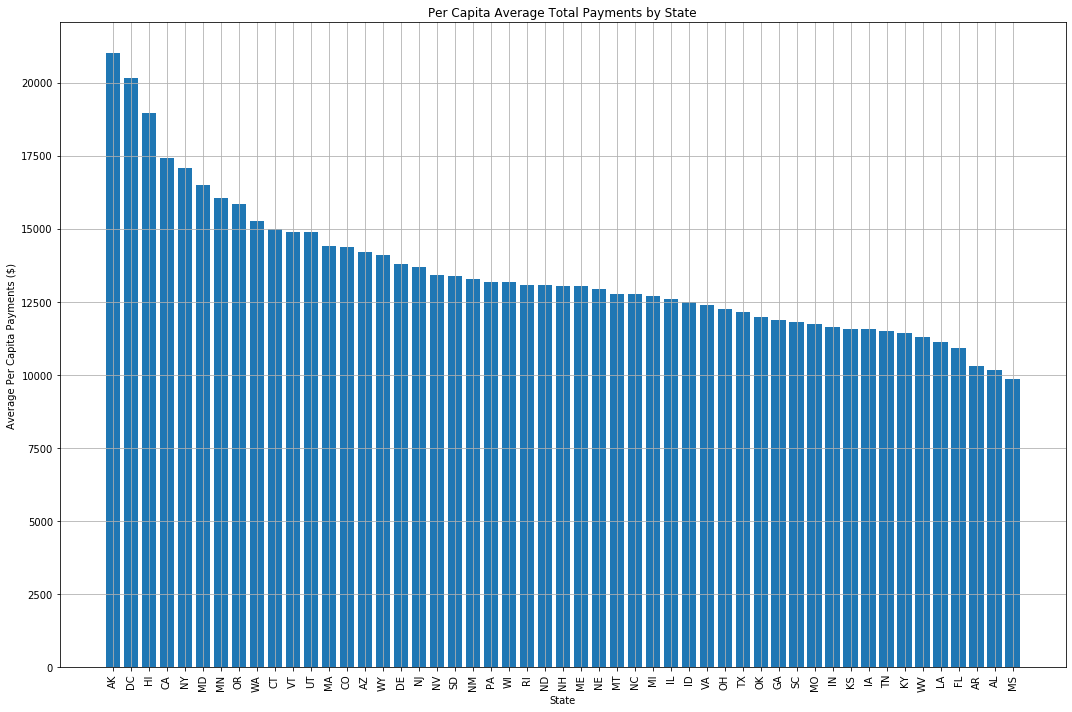

In [161]:
# readjusting figure size.
plt.figure(figsize=(15,10))
# setting x_axis by counting provider state column using len() and np.arrange().
x_axis = np.arange(len(state_total_payments_grouped["provider_state"]))
# creating variabel to loops through x_axis in order to name x axis as not numbers.
tick_locations = [value for value in x_axis]
# attaching state names to x_axis following from steps done above.
plt.xticks(tick_locations, names, rotation="vertical")
# creating bar chart with x_axis as state and per capita payments as y_axis.
plt.bar(x_axis, state_total_payments_grouped["per_capita_average_total_payments"])
# setting backgroung grid.
plt.grid()
# labeling x_axis.
plt.xlabel("State")
# labeling y_axis.
plt.ylabel("Average Per Capita Payments ($)")
# giving bar chart a title.
plt.title("Per Capita Average Total Payments by State")
# tightening the layout of bar chart.
plt.tight_layout()
# saving the figure as a png file.
plt.savefig("Per Capita Average Total Payments by State")

In [162]:
#merge cost of living and average payments dframes
merge_cost_average = pd.merge(state_total_payments_grouped, sorted_df, how='outer', on='provider_state')
# verifying results.
merge_cost_average.head()

,provider_state,per_capita_average_total_payments,costRank,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost,Total,Original Medicare,Medicare Advantage & Other Health Plans,Percentage of Medicare Advantage
0,AK,21007.01,129.9,134.2,133.9,154.2,130.8,150.9,80134,78805,1329,1.7
1,DC,20149.64,158.4,115.5,267.0,119.7,116.6,97.3,74444,60015,14429,19.4
2,HI,18959.70,192.9,169.3,318.6,172.7,148.6,116.8,225191,108107,117084,52.0
3,CA,17412.12,151.7,121.4,227.3,117.7,138.9,114.5,5314498,2825802,2488697,46.8
4,NY,17086.80,139.1,114.8,204.4,108.7,116.6,104.8,3126039,1770649,1355390,43.4


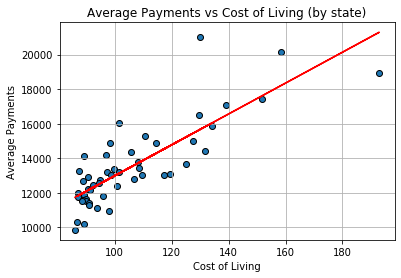

In [163]:
#set up scatter plot of average payment vs cost of living
plt.scatter(merge_cost_average['costRank'], merge_cost_average["per_capita_average_total_payments"], edgecolor='k')
plt.grid(True)
plt.title('Average Payments vs Cost of Living (by state)')
plt.xlabel('Cost of Living')
plt.ylabel('Average Payments')

z = np.polyfit(merge_cost_average['costRank'], 
               merge_cost_average["per_capita_average_total_payments"], 1)
p = np.poly1d(z)
pylab.plot(merge_cost_average['costRank'], 
           p(merge_cost_average['costRank']),"r")

#save and then show chart
plt.savefig('avgpaymentvscostliving.png')
plt.show()

In [164]:
# creating more refined dataframe based on costRank and per capita average total payments.
pay_cost = merge_cost_average[['costRank', "per_capita_average_total_payments"]]

In [165]:
# finding correlation between costRank and per capita average total payments.
pay_cost.corr()
#very strong correlation btw cost of living and average payment, as expected

,costRank,per_capita_average_total_payments
costRank,1.000000,0.817891
per_capita_average_total_payments,0.817891,1.000000


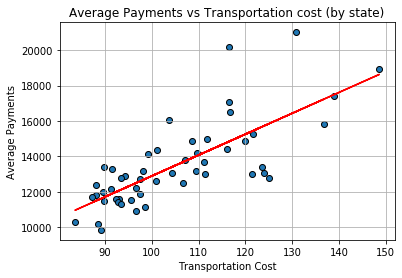

In [166]:
#set up scatter plot for transportation vs payments
plt.scatter(merge_cost_average['transportationCost'], merge_cost_average["per_capita_average_total_payments"], edgecolor='k')
plt.grid(True)
plt.title('Average Payments vs Transportation cost (by state)')
plt.xlabel('Transportation Cost')
plt.ylabel('Average Payments')

z = np.polyfit(merge_cost_average['transportationCost'], 
            merge_cost_average["per_capita_average_total_payments"], 1)
p = np.poly1d(z)
pylab.plot(merge_cost_average['transportationCost'], p(merge_cost_average['transportationCost']),"r")

#save and then show chart
plt.savefig('avgpaymentvstransportationcost.png')
plt.show()

In [167]:
# creating refined dataframe based on transportationCost and per capita average total payments.
transportation = merge_cost_average[["transportationCost", "per_capita_average_total_payments"]]
# finding correlation between transporationcost and per capita average total payments.
transportation.corr()

,transportationCost,per_capita_average_total_payments
transportationCost,1.000000,0.754087
per_capita_average_total_payments,0.754087,1.000000


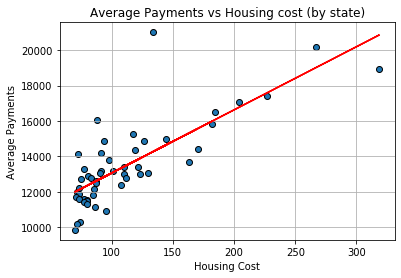

In [168]:
#set up scatter plot for housing vs payments
plt.scatter(merge_cost_average['housingCost'], merge_cost_average["per_capita_average_total_payments"], edgecolor='k')
plt.grid(True)
plt.title('Average Payments vs Housing cost (by state)')
plt.xlabel('Housing Cost')
plt.ylabel('Average Payments')

z = np.polyfit(merge_cost_average['housingCost'], 
               merge_cost_average["per_capita_average_total_payments"], 1)
p = np.poly1d(z)
pylab.plot(merge_cost_average['housingCost'], p(merge_cost_average['housingCost']),"r")

#save and then show chart
plt.savefig('avgpaymentvshousingcost.png')
plt.show()

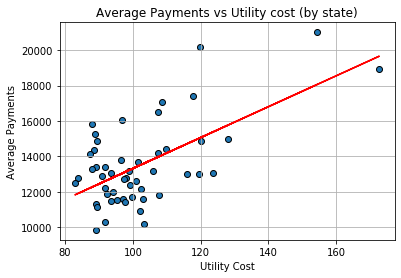

In [169]:
#set up scatter plot for utilities vs payments
plt.scatter(merge_cost_average['utilitiesCost'], merge_cost_average["per_capita_average_total_payments"], edgecolor='k')
plt.grid(True)
plt.title('Average Payments vs Utility cost (by state)')
plt.xlabel('Utility Cost')
plt.ylabel('Average Payments')

z = np.polyfit(merge_cost_average['utilitiesCost'], 
            merge_cost_average["per_capita_average_total_payments"], 1)
p = np.poly1d(z)
pylab.plot(merge_cost_average['utilitiesCost'], p(merge_cost_average['utilitiesCost']),"r")

#save and then show chart
plt.savefig('avgpaymentvsutilitycost.png')
plt.show()

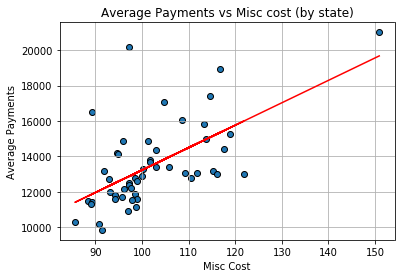

In [170]:
#set up scatter plot for misc cost vs payments
plt.scatter(merge_cost_average['miscCost'], merge_cost_average["per_capita_average_total_payments"], edgecolor='k')
plt.grid(True)
plt.title('Average Payments vs Misc cost (by state)')
plt.xlabel('Misc Cost')
plt.ylabel('Average Payments')

z = np.polyfit(merge_cost_average['miscCost'], 
            merge_cost_average["per_capita_average_total_payments"], 1)
p = np.poly1d(z)
pylab.plot(merge_cost_average['miscCost'], p(merge_cost_average['miscCost']),"r")

#save and then show chart
# plt.savefig('avgpaymentvsmisccost.png')
plt.show()

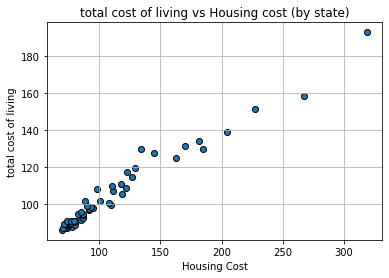

In [171]:
#set up scatter plot to show relationship between housing and total cost of living- strong correlation
#this doesn't really mean anything, but it's a nice graph to look at
plt.scatter(cost_living['housingCost'], cost_living['costRank'], edgecolor='k')
plt.grid(True)
plt.title('total cost of living vs Housing cost (by state)')
plt.xlabel('Housing Cost')
plt.ylabel('total cost of living')

#save and then show chart
# plt.savefig('avgpaymentvscostliving.png')
plt.show()

In [172]:
#housing is a large driver of cost of living
cost_housing =cost_living[['housingCost', 'costRank']]
cost_housing.corr()

,housingCost,costRank
housingCost,1.000000,0.981318
costRank,0.981318,1.000000


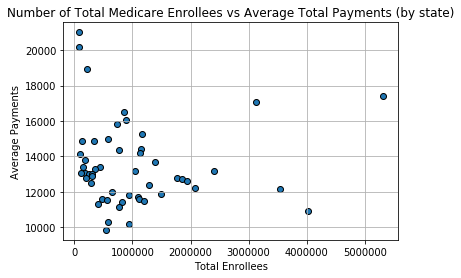

In [173]:
#set up scatter plot for number of medicare enrollees by state vs payments
plt.scatter(merge_cost_average['Total'], merge_cost_average["per_capita_average_total_payments"], edgecolor='k')
plt.grid(True)
plt.title('Number of Total Medicare Enrollees vs Average Total Payments (by state)')
plt.xlabel('Total Enrollees')
plt.ylabel('Average Payments')

#save and then show chart
plt.savefig('enrolleesvstotalpayments.png')
plt.show()

In [174]:
#no correlation between number of Med participants in a state vs average payment in that state
tot_enrollees = merge_cost_average[['Total', "per_capita_average_total_payments"]]
tot_enrollees.corr()

,Total,per_capita_average_total_payments
Total,1.000000,-0.023086
per_capita_average_total_payments,-0.023086,1.000000


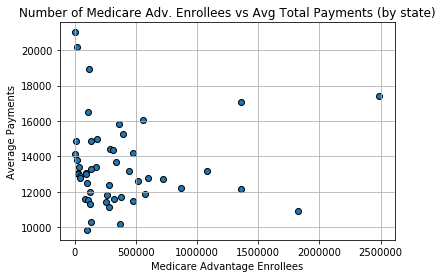

In [175]:
#set up scatter plot for number of medicare enrollees by state vs payments
plt.scatter(merge_cost_average['Medicare Advantage & Other Health Plans'], merge_cost_average["per_capita_average_total_payments"], edgecolor='k')
plt.grid(True)
plt.title('Number of Medicare Adv. Enrollees vs Avg Total Payments (by state)')
plt.xlabel('Medicare Advantage Enrollees')
plt.ylabel('Average Payments')

#save and then show chart
plt.savefig('avgpaymentvspremiummembers.png')
plt.show()

In [176]:
#no correlation
med_advantage = merge_cost_average[['Medicare Advantage & Other Health Plans', "per_capita_average_total_payments"]]
med_advantage.corr()

,Medicare Advantage & Other Health Plans,per_capita_average_total_payments
Medicare Advantage & Other Health Plans,1.000000,0.040901
per_capita_average_total_payments,0.040901,1.000000


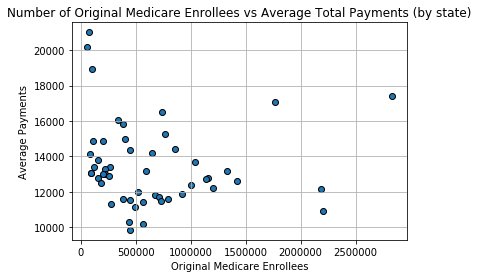

In [177]:
#set up scatter plot for number of 'original' medicare enrollees by state vs payments
plt.scatter(merge_cost_average['Original Medicare'], merge_cost_average["per_capita_average_total_payments"], edgecolor='k')
plt.grid(True)
plt.title('Number of Original Medicare Enrollees vs Average Total Payments (by state)')
plt.xlabel('Original Medicare Enrollees')
plt.ylabel('Average Payments')

# z = np.polyfit(merge_cost_average['housingCost'], 
#                merge_cost_average["per capita average total payments"], 1)
# p = np.poly1d(z)
# pylab.plot(merge_cost_average['housingCost'], p(merge_cost_average['housingCost']),"r")

#save and then show chart
# plt.savefig('avgpaymentvsorigmedmembers.png')
plt.show()

In [178]:
original = merge_cost_average[['Original Medicare', "per_capita_average_total_payments"]]
original.corr()

,Original Medicare,per_capita_average_total_payments
Original Medicare,1.000000,-0.074288
per_capita_average_total_payments,-0.074288,1.000000


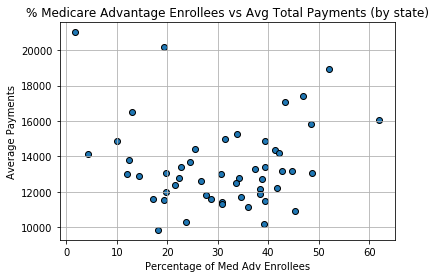

In [179]:
#set up scatter plot for percentage of medicare advantage enrollees by state vs payments
plt.scatter(merge_cost_average['Percentage of Medicare Advantage'], merge_cost_average["per_capita_average_total_payments"], edgecolor='k')
plt.grid(True)
plt.title('% Medicare Advantage Enrollees vs Avg Total Payments (by state)')
plt.xlabel('Percentage of Med Adv Enrollees')
plt.ylabel('Average Payments')

#save and then show chart
plt.savefig('avgpymntandmedadvperc.png')
plt.show()

In [180]:
#nope
med_adv = merge_cost_average[["Percentage of Medicare Advantage", "per_capita_average_total_payments"]]
med_adv.corr()

,Percentage of Medicare Advantage,per_capita_average_total_payments
Percentage of Medicare Advantage,1.000000,-0.003639
per_capita_average_total_payments,-0.003639,1.000000


In [181]:
# analyzing medicare payments now. Above analyzing total payments. 
# taking the state_grouped dataframe created way above and now only keeping per capita average medicare payments column and states and again reseting index to making provider_state a column.
state_medicare_grouped = state_grouped["per_capita_average_medicare_payments"].reset_index()

In [182]:
# sorting state_medicare dataframe by per capita average medicare payments from biggest to smallest using sort_values().
state_medicare_grouped = state_medicare_grouped.sort_values("per_capita_average_medicare_payments", ascending=False)

In [183]:
# verifying sorted results.
state_medicare_grouped.head()

,provider_state,per_capita_average_medicare_payments
0,AK,18311.06
7,DC,15618.31
4,CA,15307.36
20,MD,15009.39
11,HI,14891.39


In [184]:
# creating empty list like before.
names = []
# filling empty list with state names using for loop.
for name in state_medicare_grouped["provider_state"]: 
    names.append(name)
# now can create bar chart names.

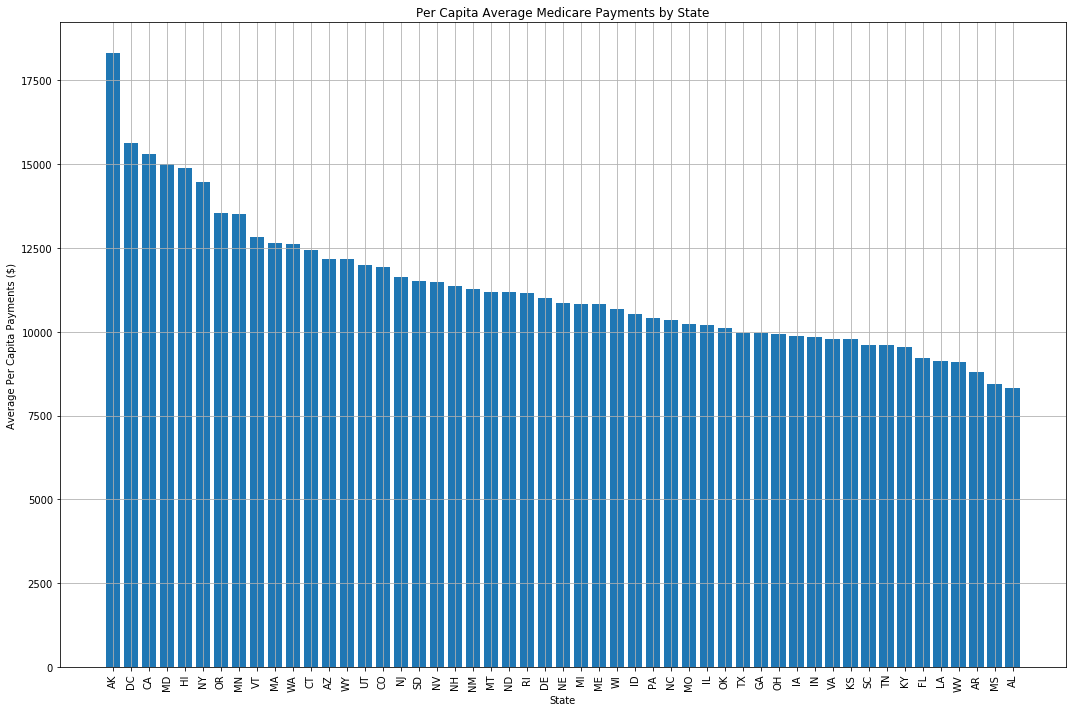

In [185]:
# resizing bar chart figure.
plt.figure(figsize=(15,10))
# creating x_axis with np.arrange() and len() based on number of states.
x_axis = np.arange(len(state_medicare_grouped["provider_state"]))
# creating looped variable that will allow naming of x_axis with state names and not numbers.
tick_locations = [value for value in x_axis]
# renaming x_axis with state names and making vertical.
plt.xticks(tick_locations, names, rotation="vertical")
# creating barchart representing per capita average medicare payments by state.
plt.bar(x_axis, state_medicare_grouped["per_capita_average_medicare_payments"])
# creating background grid.
plt.grid()
# labeling x_axis.
plt.xlabel("State")
# labeling y_axis.
plt.ylabel("Average Per Capita Payments ($)")
# creating title to bar graph.
plt.title("Per Capita Average Medicare Payments by State")
# tighting bar char layout.
plt.tight_layout()
# saving the barchart as png file.
plt.savefig("Per Capita Average Medicare Payments by State")

In [186]:
#merge cost of living with grouped by medicare payout df
merge_cost_average_medpay = pd.merge(state_medicare_grouped, sorted_df, how='outer', on='provider_state')
# verify results.
merge_cost_average_medpay.head()

,provider_state,per_capita_average_medicare_payments,costRank,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost,Total,Original Medicare,Medicare Advantage & Other Health Plans,Percentage of Medicare Advantage
0,AK,18311.06,129.9,134.2,133.9,154.2,130.8,150.9,80134,78805,1329,1.7
1,DC,15618.31,158.4,115.5,267.0,119.7,116.6,97.3,74444,60015,14429,19.4
2,CA,15307.36,151.7,121.4,227.3,117.7,138.9,114.5,5314498,2825802,2488697,46.8
3,MD,15009.39,129.7,108.5,184.5,107.3,116.7,89.2,854840,743622,111218,13.0
4,HI,14891.39,192.9,169.3,318.6,172.7,148.6,116.8,225191,108107,117084,52.0


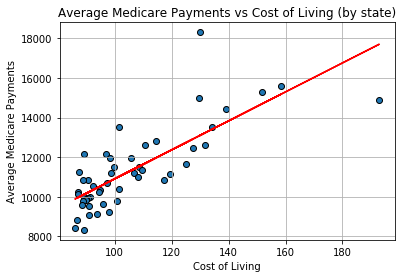

In [187]:
#set up scatter plot of medicare payments vs cost of living
plt.scatter(merge_cost_average_medpay['costRank'], merge_cost_average_medpay["per_capita_average_medicare_payments"], edgecolor='k')
plt.grid(True)
plt.title('Average Medicare Payments vs Cost of Living (by state)')
plt.xlabel('Cost of Living')
plt.ylabel('Average Medicare Payments')

z = np.polyfit(merge_cost_average_medpay['costRank'], 
            merge_cost_average_medpay["per_capita_average_medicare_payments"], 1)
p = np.poly1d(z)
pylab.plot(merge_cost_average_medpay['costRank'], p(merge_cost_average_medpay['costRank']),"r")

#save and then show chart
plt.savefig('medicarepaymentvscostliving.png')
plt.show()

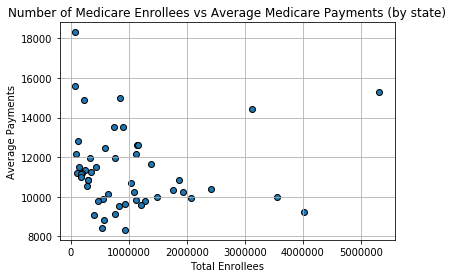

In [188]:
#set up scatter plot for number of medicare enrollees by state vs payments
plt.scatter(merge_cost_average_medpay['Total'], merge_cost_average_medpay["per_capita_average_medicare_payments"], edgecolor='k')
plt.grid(True)
plt.title('Number of Medicare Enrollees vs Average Medicare Payments (by state)')
plt.xlabel('Total Enrollees')
plt.ylabel('Average Payments')

# z = np.polyfit(merge_cost_average['housingCost'], 
#                merge_cost_average["per capita Medica payments"], 1)
# p = np.poly1d(z)
# pylab.plot(merge_cost_average['housingCost'], p(merge_cost_average['housingCost']),"r")

#save and then show chart
# plt.savefig('avgmedpaywenrollees.png')
plt.show()

In [189]:
# now analyze consumer payments by state. So now only include per capita average consumer payments column from state_grouped dataframe and reseting index.
state_consumer_payment_grouped = state_grouped["per_capita_average_consumer_payments"].reset_index()

In [190]:
# sorting the state_consumer_payment_grouped dataframe from biggest to smallest.
state_consumer_payment_grouped = state_consumer_payment_grouped.sort_values("per_capita_average_consumer_payments", ascending=False)

In [191]:
# verifying results.
state_consumer_payment_grouped.head()

,provider_state,per_capita_average_consumer_payments
7,DC,4531.33
11,HI,4068.31
44,UT,2909.63
8,DE,2808.60
38,PA,2771.77


In [192]:
# creating empyty list.
names = []
# appending empty list with state names.
for name in state_consumer_payment_grouped["provider_state"]: 
    names.append(name)
# ready for bar chart.

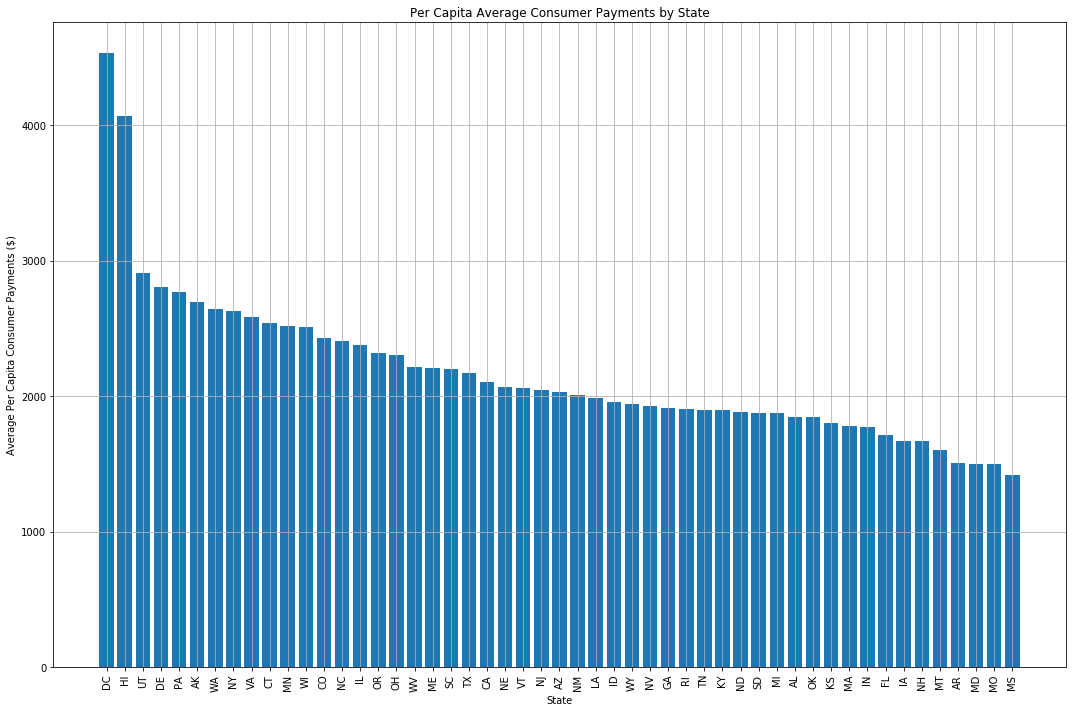

In [193]:
# resizing barchart.
plt.figure(figsize=(15,10))
# creating x_axis based on number of states.
x_axis = np.arange(len(state_consumer_payment_grouped["provider_state"]))
# creating variable to help label x_axis with state names.
tick_locations = [value for value in x_axis]
# completing final step towards creating x_axis with vertical state names.
plt.xticks(tick_locations, names, rotation="vertical")
# creating bar chart comparing per capita average consumer payments by state.
plt.bar(x_axis, state_consumer_payment_grouped["per_capita_average_consumer_payments"])
# setting background grid.
plt.grid()
# labeling x_axis.
plt.xlabel("State")
# labeling y_axis.
plt.ylabel("Average Per Capita Consumer Payments ($)")
# giving bar chart a title.
plt.title("Per Capita Average Consumer Payments by State")
# giving bar chart tighter look.
plt.tight_layout()
# saving per capita average consumer payments by state bar chart as png file.
plt.savefig("Per Capita Average Consumer Payments by State")

In [194]:
#merge cost of living with grouped by consumer payout df
merge_cost_average_consumer = pd.merge(state_consumer_payment_grouped, sorted_df, how='outer', on='provider_state')
# verifying results.
merge_cost_average_consumer.head()

,provider_state,per_capita_average_consumer_payments,costRank,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost,Total,Original Medicare,Medicare Advantage & Other Health Plans,Percentage of Medicare Advantage
0,DC,4531.33,158.4,115.5,267.0,119.7,116.6,97.3,74444,60015,14429,19.4
1,HI,4068.31,192.9,169.3,318.6,172.7,148.6,116.8,225191,108107,117084,52.0
2,UT,2909.63,98.4,98.5,93.6,89.4,108.6,96.0,333828,202482,131346,39.3
3,DE,2808.60,108.1,113.4,98.2,96.5,107.0,101.6,179142,156719,22423,12.5
4,PA,2771.77,101.7,106.9,100.8,106.0,109.5,91.9,2410301,1333311,1076990,44.7


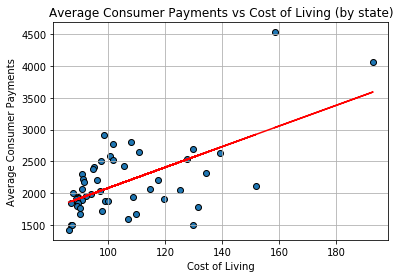

In [195]:
#set up scatter plot of consumer payments vs cost of living
plt.scatter(merge_cost_average_consumer['costRank'], merge_cost_average_consumer["per_capita_average_consumer_payments"], edgecolor='k')
plt.grid(True)
plt.title('Average Consumer Payments vs Cost of Living (by state)')
plt.xlabel('Cost of Living')
plt.ylabel('Average Consumer Payments')

z = np.polyfit(merge_cost_average_consumer['costRank'], 
                                     merge_cost_average_consumer["per_capita_average_consumer_payments"], 1)
p = np.poly1d(z)
pylab.plot(merge_cost_average_consumer['costRank'],p(merge_cost_average_consumer['costRank']),"r-")

#save and then show chart
# plt.savefig('consumerpaymentvscostliving.png')
plt.show()

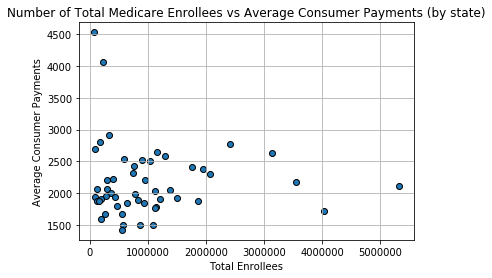

In [196]:
#set up scatter plot for number of medicare enrollees by state vs consumer payments
plt.scatter(merge_cost_average_consumer['Total'], merge_cost_average_consumer["per_capita_average_consumer_payments"], edgecolor='k')
plt.grid(True)
plt.title('Number of Total Medicare Enrollees vs Average Consumer Payments (by state)')
plt.xlabel('Total Enrollees')
plt.ylabel('Average Consumer Payments')

#save and then show chart
plt.show()

In [197]:
#no correlation
consumer = merge_cost_average_consumer[["Total", "per_capita_average_consumer_payments"]]
consumer.corr()

,Total,per_capita_average_consumer_payments
Total,1.000000,-0.052405
per_capita_average_consumer_payments,-0.052405,1.000000


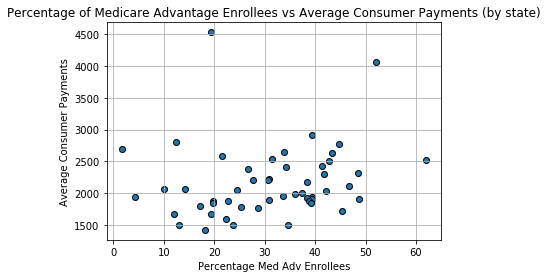

In [198]:
#set up scatter plot for percentage of medicare advatage enrollees by state vs consumer payments
plt.scatter(merge_cost_average_consumer['Percentage of Medicare Advantage'], 
            merge_cost_average_consumer["per_capita_average_consumer_payments"], edgecolor='k')
plt.grid(True)
plt.title('Percentage of Medicare Advantage Enrollees vs Average Consumer Payments (by state)')
plt.xlabel('Percentage Med Adv Enrollees')
plt.ylabel('Average Consumer Payments')

#save and then show chart
plt.show()

In [199]:
#no correlation
cons_med_adv = merge_cost_average_consumer[["Percentage of Medicare Advantage", "per_capita_average_consumer_payments"]]
cons_med_adv.corr()

,Percentage of Medicare Advantage,per_capita_average_consumer_payments
Percentage of Medicare Advantage,1.000000,0.186348
per_capita_average_consumer_payments,0.186348,1.000000


In [200]:
# Last bar chart process. Comparing average covered charges by state now. Did a new groupby data frame as well.
average_covered_charges = data_2017.groupby("provider_state").sum()
# verifying results.
average_covered_charges.head()

,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,average_consumer_payments,total_covered_charges,total_payments,total_medicare_payments,total_consumer_payments
provider_state,,,,,,,,,
AK,7681,2.337966e+07,5.705120e+06,4.996261e+06,708859.07,6.644232e+08,1.613549e+08,1.406472e+08,2.070764e+07
AL,142060,2.143038e+08,4.119621e+07,3.409628e+07,7099926.01,7.463371e+09,1.445037e+09,1.182575e+09,2.624626e+08
AR,91655,1.058598e+08,2.707915e+07,2.321937e+07,3859778.17,3.637367e+09,9.448575e+08,8.071309e+08,1.377266e+08
AZ,115039,2.434176e+08,5.071762e+07,4.397756e+07,6740056.79,7.735654e+09,1.634324e+09,1.400898e+09,2.334254e+08
CA,531134,1.619089e+09,2.802472e+08,2.466170e+08,33630191.47,5.423888e+10,9.248171e+09,8.130260e+09,1.117911e+09


In [201]:
# calculating per capita average covered charges(total_covered_charges/total discharges) and making adding it as column to average_covered_charges dataframe.
average_covered_charges["per capita average covered charges"] = average_covered_charges["total_covered_charges"]/average_covered_charges["total_discharges"] 

In [202]:
# making dataframe only using state names and per capita average covered charges and reseting index.
average_covered_charges = average_covered_charges["per capita average covered charges"].reset_index()

In [203]:
# sorting average_covered_charges greatest to least per capita average covered charges aka ascending false.
average_covered_charges = average_covered_charges.sort_values("per capita average covered charges", ascending=False)

In [204]:
# verifying sorted results.
average_covered_charges.head()

,provider_state,per capita average covered charges
4,CA,102119.017717
33,NV,92049.817804
0,AK,86502.175326
31,NJ,83481.968550
7,DC,77743.054907


In [205]:
# creating empty list.
names = []
# appending empty list with state names using provider state columnn in dataframe.
for name in average_covered_charges["provider_state"]: 
    names.append(name)

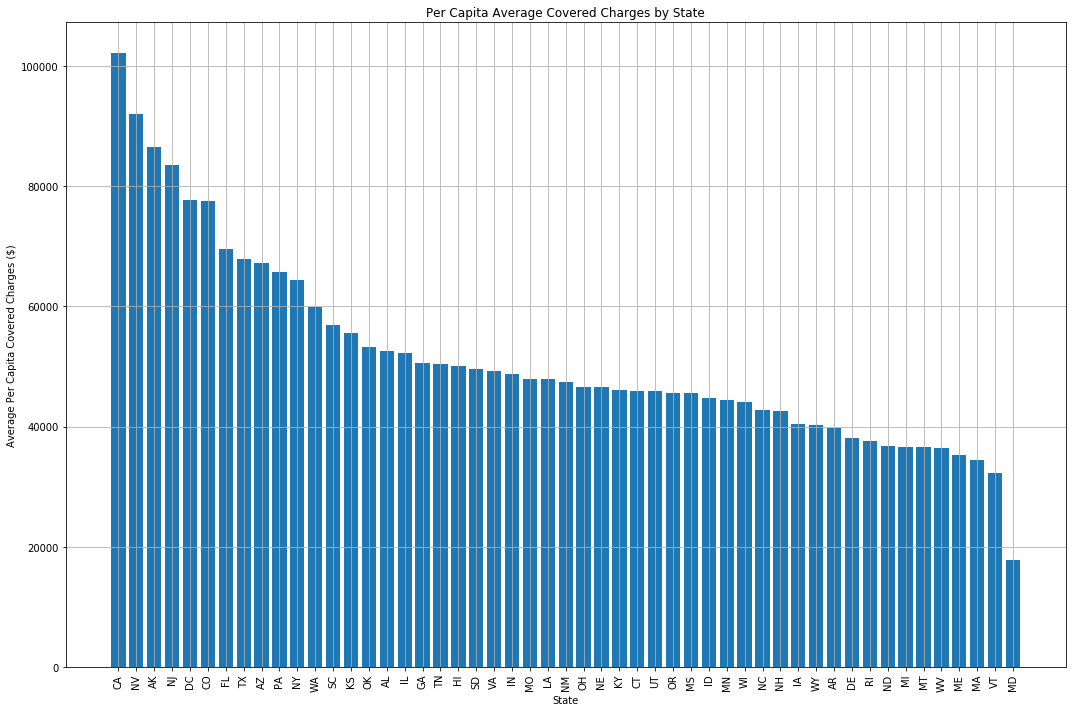

In [206]:
# setting figuresize of per capita average covered charges by state bar chart.
plt.figure(figsize=(15,10))
# setting x_axis according to len of provider state column.
x_axis = np.arange(len(average_covered_charges["provider_state"]))
# creating variable to allow attachment of state names list to x_axis.
tick_locations = [value for value in x_axis]
# attaching statenames to x_axis in vertical form. 
plt.xticks(tick_locations, names, rotation="vertical")
# creating bar chart that measures per capita average covered charges by state.
plt.bar(x_axis, average_covered_charges["per capita average covered charges"])
# setting background grid.
plt.grid()
# setting x_axis label as State.
plt.xlabel("State")
# setting y_axis label as per capita covered charge more or less.
plt.ylabel("Average Per Capita Covered Charges ($)")
# giving bar chart title.
plt.title("Per Capita Average Covered Charges by State")
# tighting up the look up bar chart.
plt.tight_layout()
# saving per capita average covered charges bar chart as png file.
plt.savefig("Per Capita Average Covered Charges by State")

In [207]:
#merge cost of living with grouped by covered charges df
merge_cost_covered_charges = pd.merge(average_covered_charges, sorted_df, how='outer', on='provider_state')
# verifying results.
merge_cost_covered_charges.head()

,provider_state,per capita average covered charges,costRank,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost,Total,Original Medicare,Medicare Advantage & Other Health Plans,Percentage of Medicare Advantage
0,CA,102119.017717,151.7,121.4,227.3,117.7,138.9,114.5,5314498,2825802,2488697,46.8
1,NV,92049.817804,108.5,108.3,121.8,89.0,123.5,105.7,439722,266673,173049,39.4
2,AK,86502.175326,129.9,134.2,133.9,154.2,130.8,150.9,80134,78805,1329,1.7
3,NJ,83481.968550,125.1,109.5,163.1,101.6,111.1,101.7,1381564,1042780,338785,24.5
4,DC,77743.054907,158.4,115.5,267.0,119.7,116.6,97.3,74444,60015,14429,19.4


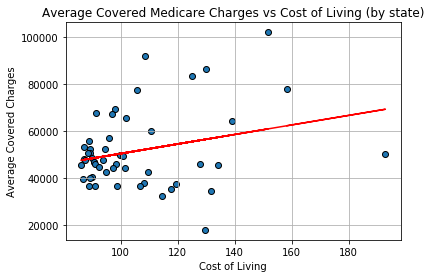

In [208]:
#set up scatter plot of covered costs vs cost of living
plt.scatter(merge_cost_covered_charges['costRank'], merge_cost_covered_charges["per capita average covered charges"], edgecolor='k')
plt.grid(True)
plt.title('Average Covered Medicare Charges vs Cost of Living (by state)')
plt.xlabel('Cost of Living')
plt.ylabel('Average Covered Charges')

z = np.polyfit(merge_cost_covered_charges['costRank'], 
            merge_cost_covered_charges["per capita average covered charges"], 1)
p = np.poly1d(z)
pylab.plot(merge_cost_average_consumer['costRank'],p(merge_cost_average_consumer['costRank']),"r")

#save and then show chart
# plt.savefig('consumerpaymentvscostliving.png')
plt.show()

In [209]:
#very weak correlation
covered = merge_cost_covered_charges[["costRank", "per capita average covered charges"]]
covered.corr()

,costRank,per capita average covered charges
costRank,1.000000,0.269679
per capita average covered charges,0.269679,1.000000


*Observation:
*For some reason Maryland has a relatively high total and medicare payments, but low on consumer payment and average covered charge.

In [210]:
# Bar charts done. Now merging state_grouped dataframe created before first bar chart with physician_data data frame created at top in order to compare number of physicians per state by total medical payments per capita.
physician_data = pd.merge(state_grouped, physician_data, on="provider_state")

In [211]:
# veryfing merge worked.
physician_data.head()

,provider_state,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,average_consumer_payments,total_covered_charges,total_payments,total_medicare_payments,total_consumer_payments,per_capita_average_total_payments,per_capita_average_medicare_payments,per_capita_average_consumer_payments,State,primary_care_physicians,specialist_physicians,Total
0,AK,7681,2.337966e+07,5.705120e+06,4.996261e+06,708859.07,6.644232e+08,1.613549e+08,1.406472e+08,2.070764e+07,21007.01,18311.06,2695.96,Alaska,1054.0,846.0,1900.0
1,AL,142060,2.143038e+08,4.119621e+07,3.409628e+07,7099926.01,7.463371e+09,1.445037e+09,1.182575e+09,2.624626e+08,10172.02,8324.47,1847.55,Alabama,5863.0,6342.0,12205.0
2,AR,91655,1.058598e+08,2.707915e+07,2.321937e+07,3859778.17,3.637367e+09,9.448575e+08,8.071309e+08,1.377266e+08,10308.85,8806.18,1502.66,Arkansas,3513.0,3637.0,7150.0
3,AZ,115039,2.434176e+08,5.071762e+07,4.397756e+07,6740056.79,7.735654e+09,1.634324e+09,1.400898e+09,2.334254e+08,14206.69,12177.60,2029.10,Arizona,8537.0,9269.0,17806.0
4,CA,531134,1.619089e+09,2.802472e+08,2.466170e+08,33630191.47,5.423888e+10,9.248171e+09,8.130260e+09,1.117911e+09,17412.12,15307.36,2104.76,California,54135.0,58771.0,112906.0


In [212]:
# adding columns to new physician_data dataframe with per capita results(total discharges divided by total, primary and specialist physician numbers)
physician_data["per_capita_discharges_per_total_physicians"] = physician_data["total_discharges"]/physician_data["Total"]
physician_data["per_capita_discharges_per_primary_care_physicians"] = physician_data["total_discharges"]/physician_data["primary_care_physicians"]
physician_data["per_capita_discharges_per_specialty_physicians"] = physician_data["total_discharges"]/physician_data["specialist_physicians"]

In [213]:
# sorting the physician data by per capita discharges per total physicians in ascending and setting to new variable(added as "a")
physician_data_a = physician_data.sort_values("per_capita_discharges_per_total_physicians", ascending=False)
# verifying results.
physician_data_a

,provider_state,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,average_consumer_payments,total_covered_charges,total_payments,total_medicare_payments,total_consumer_payments,per_capita_average_total_payments,per_capita_average_medicare_payments,per_capita_average_consumer_payments,State,primary_care_physicians,specialist_physicians,Total,per_capita_discharges_per_total_physicians,per_capita_discharges_per_primary_care_physicians,per_capita_discharges_per_specialty_physicians
25,MS,99670,1.299886e+08,2.797369e+07,2.410535e+07,3868335.22,4.538800e+09,9.818652e+08,8.403730e+08,1.414922e+08,9851.16,8431.55,1419.61,Mississippi,3216.0,3381.0,6597.0,15.108383,30.991915,29.479444
41,SD,27264,3.493172e+07,9.406980e+06,8.097492e+06,1309488.68,1.353099e+09,3.649840e+08,3.137980e+08,5.118600e+07,13387.03,11509.61,1877.42,South Dakota,1083.0,958.0,2041.0,13.358158,25.174515,28.459290
2,AR,91655,1.058598e+08,2.707915e+07,2.321937e+07,3859778.17,3.637367e+09,9.448575e+08,8.071309e+08,1.377266e+08,10308.85,8806.18,1502.66,Arkansas,3513.0,3637.0,7150.0,12.818881,26.090236,25.200715
17,KY,140856,1.739644e+08,4.300385e+07,3.605285e+07,6950998.99,6.490263e+09,1.610051e+09,1.343087e+09,2.669641e+08,11430.47,9535.17,1895.30,Kentucky,5481.0,6456.0,11937.0,11.799950,25.698960,21.817844
1,AL,142060,2.143038e+08,4.119621e+07,3.409628e+07,7099926.01,7.463371e+09,1.445037e+09,1.182575e+09,2.624626e+08,10172.02,8324.47,1847.55,Alabama,5863.0,6342.0,12205.0,11.639492,24.229916,22.399874
36,OK,107613,1.643044e+08,3.575706e+07,3.046382e+07,5293239.23,5.735671e+09,1.287878e+09,1.089078e+09,1.988001e+08,11967.68,10120.32,1847.36,Oklahoma,4810.0,4662.0,9472.0,11.361170,22.372765,23.083012
8,DE,35460,2.958177e+07,1.039170e+07,8.427156e+06,1964544.12,1.348517e+09,4.893991e+08,3.898060e+08,9.959310e+07,13801.44,10992.84,2808.60,Delaware,1564.0,1584.0,3148.0,11.264295,22.672634,22.386364
28,ND,22285,2.265864e+07,7.961019e+06,6.835905e+06,1125113.83,8.195243e+08,2.909645e+08,2.490596e+08,4.190488e+07,13056.52,11176.11,1880.41,North Dakota,1112.0,903.0,2015.0,11.059553,20.040468,24.678848
49,WV,62511,6.217319e+07,1.977525e+07,1.604055e+07,3734692.16,2.272817e+09,7.068545e+08,5.683290e+08,1.385255e+08,11307.68,9091.66,2216.02,West Virginia,2882.0,2803.0,5685.0,10.995778,21.690146,22.301463
15,IN,180891,2.460604e+08,5.810757e+07,4.963458e+07,8472987.67,8.810256e+09,2.102181e+09,1.781842e+09,3.203383e+08,11621.26,9850.36,1770.89,Indiana,8110.0,8706.0,16816.0,10.757077,22.304686,20.777739


In [217]:
test = physician_data[["provider_state", "per_capita_discharges_per_total_physicians", "per_capita_discharges_per_primary_care_physicians", "per_capita_discharges_per_specialty_physicians"]]
test = test.sort_values("per_capita_discharges_per_specialty_physicians", ascending=False)
test

,provider_state,per_capita_discharges_per_total_physicians,per_capita_discharges_per_primary_care_physicians,per_capita_discharges_per_specialty_physicians
25,MS,15.108383,30.991915,29.479444
41,SD,13.358158,25.174515,28.459290
2,AR,12.818881,26.090236,25.200715
28,ND,11.059553,20.040468,24.678848
36,OK,11.361170,22.372765,23.083012
1,AL,11.639492,24.229916,22.399874
8,DE,11.264295,22.672634,22.386364
49,WV,10.995778,21.690146,22.301463
17,KY,11.799950,25.698960,21.817844
15,IN,10.757077,22.304686,20.777739


In [738]:
#scatter plot for average payments vs average discharges per doctor
physician_data.plot.scatter("per_capita_discharges_per_total_physicians", "per_capita_average_total_payments", edgecolor="k")
plt.grid(True)
plt.title('Average Per Capita Payment vs Num of Discharges per Doctor')
plt.xlabel('Discharges per Doctor')
plt.ylabel('Average Per Capita Payment')

z = np.polyfit(physician_data['per_capita_discharges_per_total_physicians'], 
            physician_data["per_capita_average_total_payments"], 1)
p = np.poly1d(z)
pylab.plot(physician_data['per_capita_discharges_per_total_physicians'],p(physician_data['per_capita_discharges_per_total_physicians']),"r")

#save and then show chart

#save and then show chart
plt.savefig('avgpaymentvsdoctordischarges.png')
plt.show()

KeyError: 'per_capita_discharges_per_total_physicians'

In [638]:
# finding correlation between per capita discharges per total physicians by per capita average total payments.
physician_corr = physician_data[["per_capita_discharges_per_total_physicians","per_capita_average_total_payments" ]]
physician_corr.corr()

,per_capita_discharges_per_total_physicians,per_capita_average_total_payments
per_capita_discharges_per_total_physicians,1.000000,-0.732278
per_capita_average_total_payments,-0.732278,1.000000


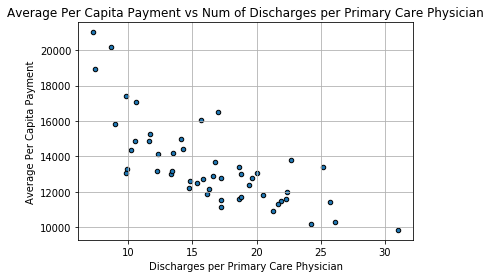

In [639]:
# creating scatter plot that measures discharges per primary care physician and total payments per discharge all according to each state.
physician_data.plot.scatter("per_capita_discharges_per_primary_care_physicians", "per_capita_average_total_payments", edgecolor="k")
plt.grid(True)
plt.title('Average Per Capita Payment vs Num of Discharges per Primary Care Physician')
plt.xlabel('Discharges per Primary Care Physician')
plt.ylabel('Average Per Capita Payment')

#save and then show chart
plt.savefig('avgpaymentvsdoctordischarges.png')
plt.show()

In [640]:
# calculating the correlation between discharges per primary care physician and per capita total payments per discharge.
physician_corr = physician_data[["per_capita_discharges_per_primary_care_physicians","per_capita_average_total_payments" ]]
physician_corr.corr()

,per_capita_discharges_per_primary_care_physicians,per_capita_average_total_payments
per_capita_discharges_per_primary_care_physicians,1.000000,-0.737713
per_capita_average_total_payments,-0.737713,1.000000


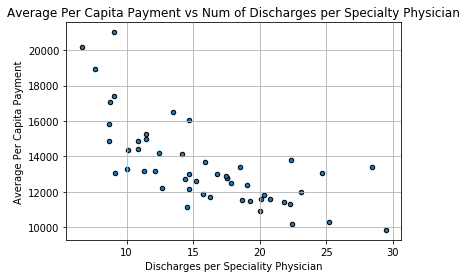

In [641]:
# creating scatter plot of discharges per speciality physicians and per capita average total payments.
physician_data.plot.scatter("per_capita_discharges_per_specialty_physicians", "per_capita_average_total_payments", edgecolor="k")
plt.grid(True)
plt.title('Average Per Capita Payment vs Num of Discharges per Specialty Physician')
plt.xlabel('Discharges per Speciality Physician')
plt.ylabel('Average Per Capita Payment')

#save and then show chart
plt.savefig('avgpaymentvsdoctordischarges.png')
plt.show()

In [642]:
# calculating the correlation betweeen dishcarges per specialty physician and per capita average total payments per discharge.
physician_corr = physician_data[["per_capita_discharges_per_specialty_physicians","per_capita_average_total_payments" ]]
physician_corr.corr()

,per_capita_discharges_per_specialty_physicians,per_capita_average_total_payments
per_capita_discharges_per_specialty_physicians,1.000000,-0.705016
per_capita_average_total_payments,-0.705016,1.000000


In [643]:
# merging state_grouped dataframe(main merging dataframe) with nurse_data data frame created at top in order to compare number of nurses per state by total medical payments per capita.
nurse_data = pd.merge(state_grouped, nurse_data, on="provider_state")

In [644]:
# verifing results
nurse_data.head()

,provider_state,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,average_consumer_payments,total_covered_charges,total_payments,total_medicare_payments,total_consumer_payments,per_capita_average_total_payments,per_capita_average_medicare_payments,per_capita_average_consumer_payments,State,nurse_total
0,AK,7681,2.337966e+07,5.705120e+06,4.996261e+06,708859.07,6.644232e+08,1.613549e+08,1.406472e+08,2.070764e+07,21007.01,18311.06,2695.96,Alaska,480.0
1,AL,142060,2.143038e+08,4.119621e+07,3.409628e+07,7099926.01,7.463371e+09,1.445037e+09,1.182575e+09,2.624626e+08,10172.02,8324.47,1847.55,Alabama,2537.0
2,AR,91655,1.058598e+08,2.707915e+07,2.321937e+07,3859778.17,3.637367e+09,9.448575e+08,8.071309e+08,1.377266e+08,10308.85,8806.18,1502.66,Arkansas,1305.0
3,AZ,115039,2.434176e+08,5.071762e+07,4.397756e+07,6740056.79,7.735654e+09,1.634324e+09,1.400898e+09,2.334254e+08,14206.69,12177.60,2029.10,Arizona,3403.0
4,CA,531134,1.619089e+09,2.802472e+08,2.466170e+08,33630191.47,5.423888e+10,9.248171e+09,8.130260e+09,1.117911e+09,17412.12,15307.36,2104.76,California,15414.0


In [645]:
# adding column to nurse_data dataframe that includes discharges per nurse grouped by state. Same process done above.
nurse_data["per_capita_discharges_per_nurse"] = nurse_data["total_discharges"]/nurse_data["nurse_total"]

In [646]:
# veryfing results.
nurse_data.head()

,provider_state,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,average_consumer_payments,total_covered_charges,total_payments,total_medicare_payments,total_consumer_payments,per_capita_average_total_payments,per_capita_average_medicare_payments,per_capita_average_consumer_payments,State,nurse_total,per_capita_discharges_per_nurse
0,AK,7681,2.337966e+07,5.705120e+06,4.996261e+06,708859.07,6.644232e+08,1.613549e+08,1.406472e+08,2.070764e+07,21007.01,18311.06,2695.96,Alaska,480.0,16.002083
1,AL,142060,2.143038e+08,4.119621e+07,3.409628e+07,7099926.01,7.463371e+09,1.445037e+09,1.182575e+09,2.624626e+08,10172.02,8324.47,1847.55,Alabama,2537.0,55.995270
2,AR,91655,1.058598e+08,2.707915e+07,2.321937e+07,3859778.17,3.637367e+09,9.448575e+08,8.071309e+08,1.377266e+08,10308.85,8806.18,1502.66,Arkansas,1305.0,70.233716
3,AZ,115039,2.434176e+08,5.071762e+07,4.397756e+07,6740056.79,7.735654e+09,1.634324e+09,1.400898e+09,2.334254e+08,14206.69,12177.60,2029.10,Arizona,3403.0,33.805172
4,CA,531134,1.619089e+09,2.802472e+08,2.466170e+08,33630191.47,5.423888e+10,9.248171e+09,8.130260e+09,1.117911e+09,17412.12,15307.36,2104.76,California,15414.0,34.457895


In [647]:
# sorting the physician data by per capita discharges per nurse from biggest to smallest.
nurse_data = nurse_data.sort_values("per_capita_discharges_per_nurse", ascending=False)
# verifying results.
nurse_data.head()

,provider_state,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,average_consumer_payments,total_covered_charges,total_payments,total_medicare_payments,total_consumer_payments,per_capita_average_total_payments,per_capita_average_medicare_payments,per_capita_average_consumer_payments,State,nurse_total,per_capita_discharges_per_nurse
36,OK,107613,1.643044e+08,35757063.66,30463824.43,5293239.23,5.735671e+09,1.287878e+09,1.089078e+09,1.988001e+08,11967.68,10120.32,1847.36,Oklahoma,1131.0,95.148541
7,DC,27599,6.121246e+07,15715339.66,12013157.66,3702182.00,2.145631e+09,5.561099e+08,4.310498e+08,1.250601e+08,20149.64,15618.31,4531.33,District of Columbia,359.0,76.877437
2,AR,91655,1.058598e+08,27079151.33,23219373.16,3859778.17,3.637367e+09,9.448575e+08,8.071309e+08,1.377266e+08,10308.85,8806.18,1502.66,Arkansas,1305.0,70.233716
33,NV,57148,1.622309e+08,23336062.74,20079783.33,3256279.41,5.260463e+09,7.670952e+08,6.567938e+08,1.103014e+08,13422.96,11492.86,1930.10,Nevada,841.0,67.952438
8,DE,35460,2.958177e+07,10391699.83,8427155.71,1964544.12,1.348517e+09,4.893991e+08,3.898060e+08,9.959310e+07,13801.44,10992.84,2808.60,Delaware,522.0,67.931034


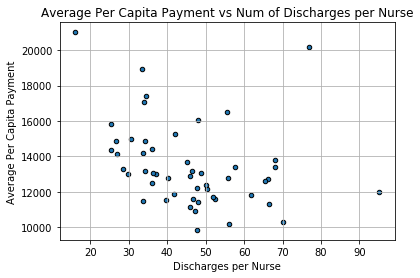

In [648]:
#scatter plot for average payments vs average discharges per nurse.
nurse_data.plot.scatter("per_capita_discharges_per_nurse", "per_capita_average_total_payments", edgecolor="k")
plt.grid(True)
plt.title('Average Per Capita Payment vs Num of Discharges per Nurse')
plt.xlabel('Discharges per Nurse')
plt.ylabel('Average Per Capita Payment')

#save and then show chart
plt.savefig('avgpaymentvsnursedischarges.png')
plt.show()

In [649]:
# calculating the correlation betweeen dishcarges per nurse and per capita average total payments per discharge.
nurse_corr = nurse_data[["per_capita_discharges_per_nurse","per_capita_average_total_payments" ]]
nurse_corr.corr()

,per_capita_discharges_per_nurse,per_capita_average_total_payments
per_capita_discharges_per_nurse,1.000000,-0.317589
per_capita_average_total_payments,-0.317589,1.000000


In [650]:
# merging state_grouped dataframe(main merging dataframe) with pa_data data frame created at top in order to compare number of physician assitants per state by total medical payments per capita.
pa_data = pd.merge(state_grouped, pa_data, on="provider_state")

In [651]:
# verifying merge worked.
pa_data.head()

,provider_state,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,average_consumer_payments,total_covered_charges,total_payments,total_medicare_payments,total_consumer_payments,per_capita_average_total_payments,per_capita_average_medicare_payments,per_capita_average_consumer_payments,State,pa_total
0,AK,7681,2.337966e+07,5.705120e+06,4.996261e+06,708859.07,6.644232e+08,1.613549e+08,1.406472e+08,2.070764e+07,21007.01,18311.06,2695.96,Alaska,346.0
1,AL,142060,2.143038e+08,4.119621e+07,3.409628e+07,7099926.01,7.463371e+09,1.445037e+09,1.182575e+09,2.624626e+08,10172.02,8324.47,1847.55,Alabama,535.0
2,AR,91655,1.058598e+08,2.707915e+07,2.321937e+07,3859778.17,3.637367e+09,9.448575e+08,8.071309e+08,1.377266e+08,10308.85,8806.18,1502.66,Arkansas,209.0
3,AZ,115039,2.434176e+08,5.071762e+07,4.397756e+07,6740056.79,7.735654e+09,1.634324e+09,1.400898e+09,2.334254e+08,14206.69,12177.60,2029.10,Arizona,1940.0
4,CA,531134,1.619089e+09,2.802472e+08,2.466170e+08,33630191.47,5.423888e+10,9.248171e+09,8.130260e+09,1.117911e+09,17412.12,15307.36,2104.76,California,7917.0


In [652]:
# adding column to pa_data dataframe that includes discharges per pa grouped by state. Same process done above.
pa_data["per_capita_discharges_per_pa"] = pa_data["total_discharges"]/pa_data["pa_total"]

In [653]:
# sorting the pa data by per capita discharges per pa from greatest to least.
pa_data = pa_data.sort_values("per_capita_discharges_per_pa", ascending=False)
# verifying results.
pa_data.head()

,provider_state,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,average_consumer_payments,total_covered_charges,total_payments,total_medicare_payments,total_consumer_payments,per_capita_average_total_payments,per_capita_average_medicare_payments,per_capita_average_consumer_payments,State,pa_total,per_capita_discharges_per_pa
25,MS,99670,1.299886e+08,27973686.77,24105351.55,3868335.22,4.538800e+09,9.818652e+08,8.403730e+08,1.414922e+08,9851.16,8431.55,1419.61,Mississippi,107.0,931.495327
2,AR,91655,1.058598e+08,27079151.33,23219373.16,3859778.17,3.637367e+09,9.448575e+08,8.071309e+08,1.377266e+08,10308.85,8806.18,1502.66,Arkansas,209.0,438.540670
24,MO,177050,2.431434e+08,58599860.42,51311425.23,7288435.19,8.491383e+09,2.077739e+09,1.812174e+09,2.655648e+08,11735.32,10235.38,1499.94,Missouri,665.0,266.240602
1,AL,142060,2.143038e+08,41196206.60,34096280.59,7099926.01,7.463371e+09,1.445037e+09,1.182575e+09,2.624626e+08,10172.02,8324.47,1847.55,Alabama,535.0,265.532710
15,IN,180891,2.460604e+08,58107572.29,49634584.62,8472987.67,8.810256e+09,2.102181e+09,1.781842e+09,3.203383e+08,11621.26,9850.36,1770.89,Indiana,845.0,214.072189


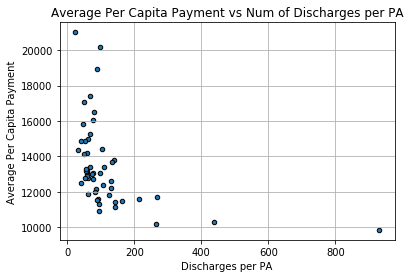

In [654]:
#scatter plot for average payments vs average discharges per pa.
pa_data.plot.scatter("per_capita_discharges_per_pa", "per_capita_average_total_payments", edgecolor="k")
plt.grid(True)
plt.title('Average Per Capita Payment vs Num of Discharges per PA')
plt.xlabel('Discharges per PA')
plt.ylabel('Average Per Capita Payment')

#save and then show chart
plt.savefig('avgpaymentvspadischarges.png')
plt.show()

In [655]:
# calculating the correlation betweeen dishcarges per pa and per capita average total payments per discharge.
pa_corr = pa_data[["per_capita_discharges_per_pa","per_capita_average_total_payments" ]]
pa_corr.corr()

,per_capita_discharges_per_pa,per_capita_average_total_payments
per_capita_discharges_per_pa,1.000000,-0.418251
per_capita_average_total_payments,-0.418251,1.000000


Observations:
    It seems that the number of physicians in each state is more correlated with average medical payments per discharge than the number of physician assitants and registered nurses. When going through the data, it can be seen that the number of physicians relative to the other two is much larger. This begs the question of if we reduce the number of phyiscians in states with high per capita medical payments, will those payments go down. This does not take into account quality of care, which is up for further invesitgation. Another idea is that if this correlation has any merit that maybe we could substitute physicians for physican's assistants and nurses whose salaries are not as high. Think about it this way, replacing 10 physicians with averages salaries of 200,000 dollars with 10 physician assistants making 100,000 would save the company one million dollars that could be used to reduce medical payments. Again this would then need to take quality of care into account as well. 

In [689]:
labor_comparison.head()

,State_x,primary_care_physicians,specialist_physicians,Total,provider_state,State_y,nurse_total,State,pa_total
0,Alabama,5863.0,6342.0,12205.0,AL,Alabama,2537.0,Alabama,535.0
1,Alaska,1054.0,846.0,1900.0,AK,Alaska,480.0,Alaska,346.0
2,Arizona,8537.0,9269.0,17806.0,AZ,Arizona,3403.0,Arizona,1940.0
3,Arkansas,3513.0,3637.0,7150.0,AR,Arkansas,1305.0,Arkansas,209.0
4,California,54135.0,58771.0,112906.0,CA,California,15414.0,California,7917.0


In [724]:
labor_comparison = labor_comparison[["State_x", "primary_care_physicians", "specialist_physicians", "nurse_total", "pa_total"]]

In [725]:
labor_comparison.head()

,State_x,primary_care_physicians,specialist_physicians,nurse_total,pa_total
0,Alabama,5863.0,6342.0,2537.0,535.0
1,Alaska,1054.0,846.0,480.0,346.0
2,Arizona,8537.0,9269.0,3403.0,1940.0
3,Arkansas,3513.0,3637.0,1305.0,209.0
4,California,54135.0,58771.0,15414.0,7917.0


In [732]:
# creating empty list.
names = []
# appending empty list with state names using provider state columnn in dataframe.
for name in labor_comparison["State_x"]: 
    names.append(name)

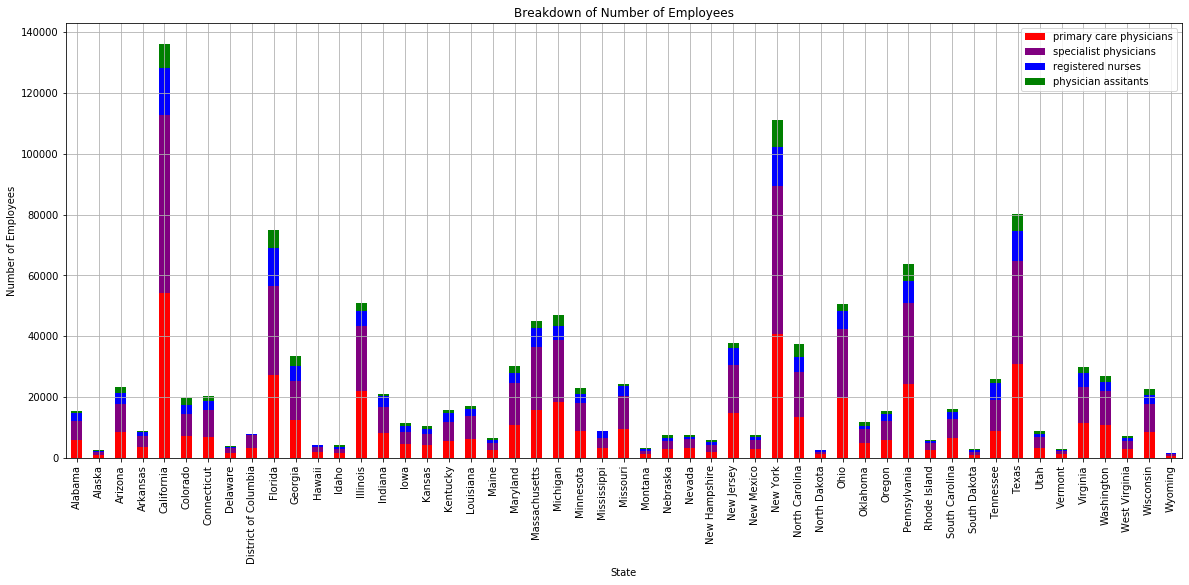

In [737]:
# creating x_axis
x_axis = np.arange(len(labor_comparison["State_x"]))
# creating varaible to attach names too.
tick_locations = [value for value in x_axis]
# making colors for each employee.
colors = ['red', 'purple', 'blue', 'green']
# creating a stacked bar chart that compares number of each employee by state.
labor_comparison.plot.bar(stacked=True, figsize=(20,8), color=colors)
# setting state names to x_axis.
plt.xticks(tick_locations, names, rotation="vertical")
# labeling the x_axis State.
plt.xlabel("State")
# labeling the y_axis Number of Employees.
plt.ylabel("Number of Employees")
# creating a title.
plt.title("Breakdown of Number of Employees")
# creating a legend to help readers.
plt.legend(('primary care physicians', 'specialist physicians', 'registered nurses', 'physician assitants'))
# creating a background grid.
plt.grid(True)
# saving stacked bar chart as png file.
plt.savefig("Breakdown of Employees by State stacked bar")